In [153]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/music-dataset/sample_submission.csv/sample_submission.csv
/kaggle/input/music-dataset/songs.csv/songs.csv
/kaggle/input/music-dataset/song_extra_info.csv/song_extra_info.csv
/kaggle/input/music-dataset/train.csv/train.csv
/kaggle/input/music-dataset/test.csv/test.csv
/kaggle/input/music-dataset/members.csv/members.csv


In [154]:
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

In [155]:
import warnings
warnings.filterwarnings('ignore')

In [156]:
train_df = pd.read_csv('/kaggle/input/music-dataset/train.csv/train.csv')
train_df

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


In [157]:
songs_df = pd.read_csv('/kaggle/input/music-dataset/songs.csv/songs.csv')
songs_df

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0


In [167]:
song_extra_info_df = pd.read_csv('/kaggle/input/music-dataset/song_extra_info.csv/song_extra_info.csv')
song_extra_info_df

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
2295966,hLnetpF6UbPg28sSfXnPE2vsdaGsLvddlXEdJR4VTIA=,Deep Breathing,PLL431720793
2295967,N+6vJ8actKQm0S3Fpf4elipTjoAo9ev28aA5FJN5e40=,In Hiding,US5UL1519827
2295968,pv35uG0ts05mWtirM/AMOWEzbHxIVart5ZzRXqKUY1c=,Il Est Ne Le Divin Enfant,PLL431502294
2295969,QSySnm8jt2Go7byY34/PxsZP6dPCins2j2cyYquNhBo=,The Exodus Song,DEPZ69316095


In [168]:
members_df = pd.read_csv('/kaggle/input/music-dataset/members.csv/members.csv')
members_df

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


# **EDA**

# Анализ train_df

In [158]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [159]:
train_df.isna().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

**Уникальные значения по признакам**

In [160]:
for col in train_df.columns:
    num = train_df[col].nunique()
    print(f'number of unique {col}: {num}')

number of unique msno: 30755
number of unique song_id: 359966
number of unique source_system_tab: 8
number of unique source_screen_name: 20
number of unique source_type: 12
number of unique target: 2


**source_type**

In [161]:
train_df.source_type.value_counts()

source_type
local-library             2261399
online-playlist           1967924
local-playlist            1079503
radio                      483109
album                      477344
top-hits-for-artist        423614
song                       244722
song-based-playlist        210527
listen-with                192842
topic-article-playlist      11194
artist                       3038
my-daily-playlist             663
Name: count, dtype: int64

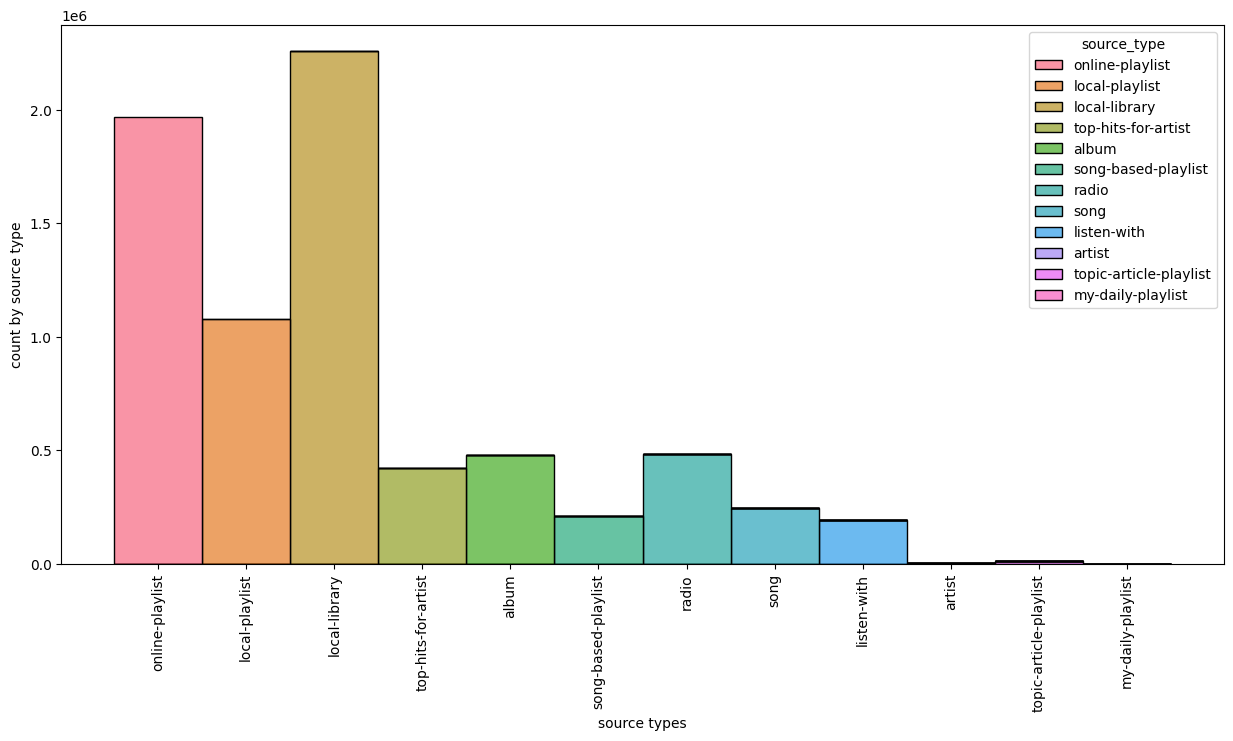

In [162]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=train_df, x='source_type', hue='source_type', multiple='stack')
ax.set_ylabel('count by source type')
ax.set_xlabel('source types')
plt.xticks(rotation='vertical')
plt.show()

**source_system_tab**

In [163]:
train_df.source_system_tab.value_counts()

source_system_tab
my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
notification       6185
settings           2200
Name: count, dtype: int64

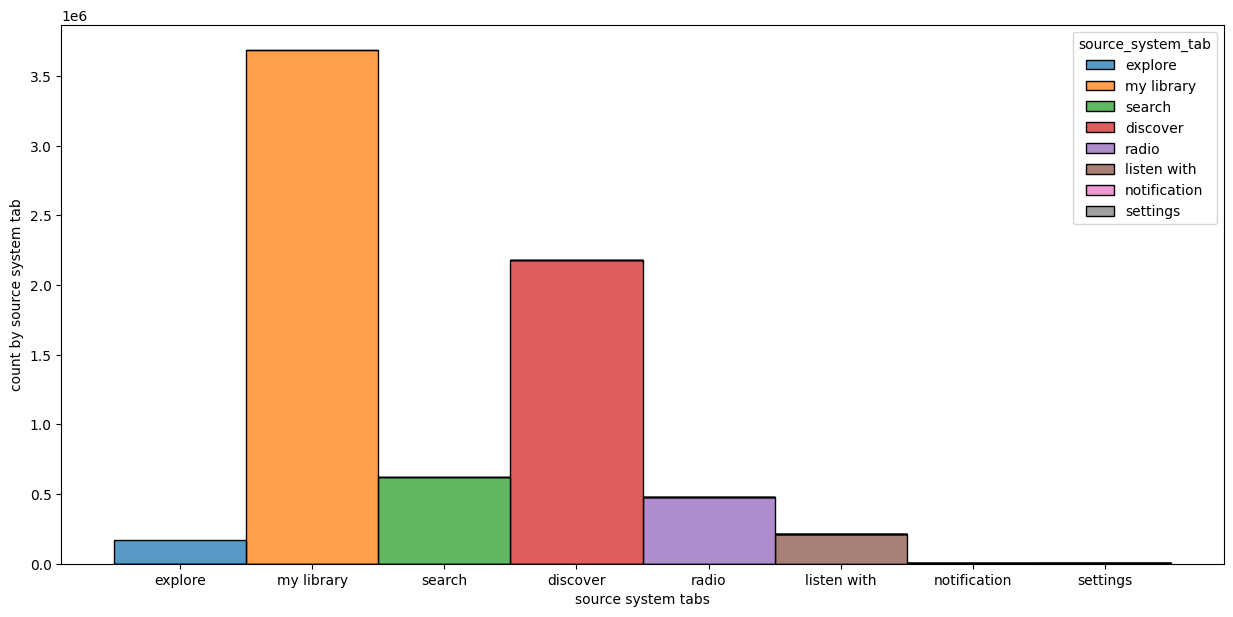

In [164]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=train_df, x='source_system_tab', hue='source_system_tab', multiple='stack')
ax.set_ylabel('count by source system tab')
ax.set_xlabel('source system tabs')
plt.show()

**source_screen_name**

In [165]:
train_df.source_screen_name.value_counts()

source_screen_name
Local playlist more     3228202
Online playlist more    1294689
Radio                    474467
Album more               420156
Search                   298487
Artist more              252429
Discover Feature         244246
Discover Chart           213658
Others profile more      201795
Discover Genre            82202
My library                75980
Explore                   72342
Unknown                   54170
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: count, dtype: int64

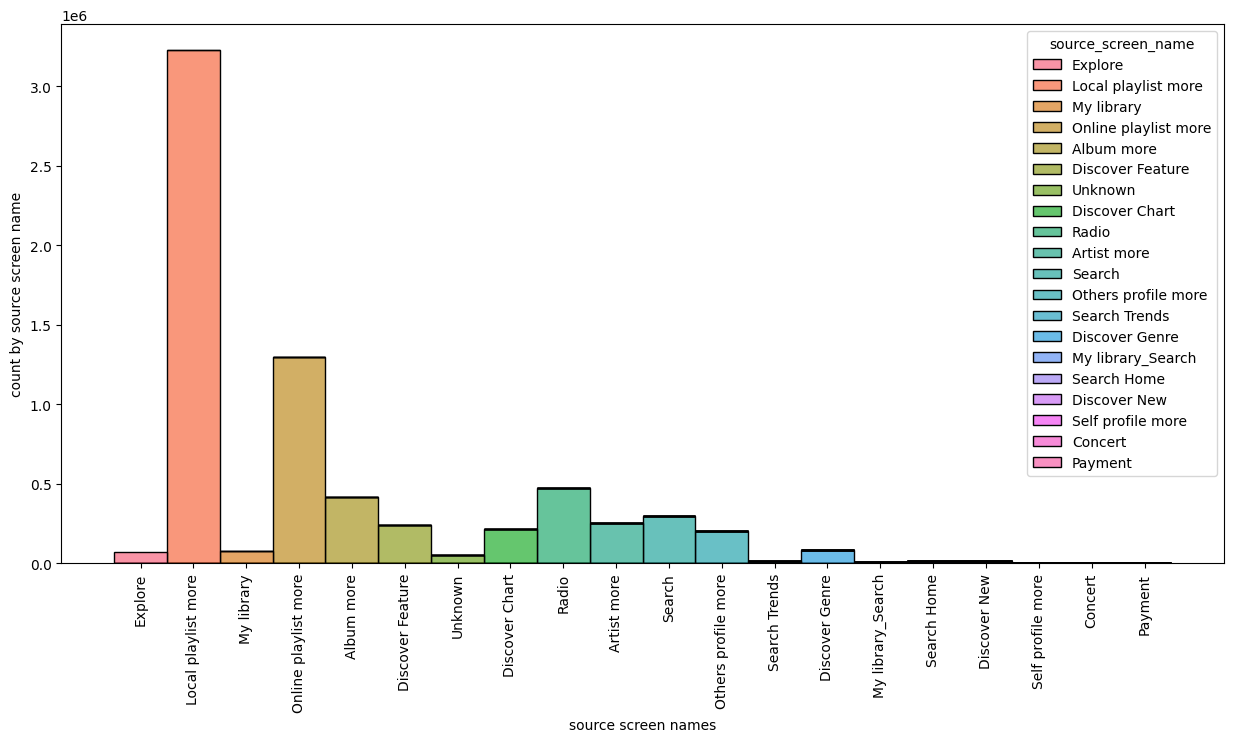

In [166]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=train_df, x='source_screen_name', hue='source_screen_name', multiple='stack')
ax.set_ylabel('count by source screen name')
ax.set_xlabel('source screen names')
plt.xticks(rotation='vertical')
plt.show()

# Анализ members_df

In [169]:
members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [170]:
members_df.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [171]:
members_df.isna().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [172]:
# пропуски в графе "возраст"
members_df.loc[members_df.bd == 0]['bd'].count()

19932

**Уникальные значения по признакам**

In [173]:
for col in members_df.columns:
    num = members_df[col].nunique()
    print(f'number of unique {col}: {num}')

number of unique msno: 34403
number of unique city: 21
number of unique bd: 95
number of unique gender: 2
number of unique registered_via: 6
number of unique registration_init_time: 3862
number of unique expiration_date: 1484


**registered_via**

In [174]:
members_df.registered_via.value_counts()

registered_via
4     11392
7      9433
9      8628
3      4879
13       70
16        1
Name: count, dtype: int64

**registration_init_time**

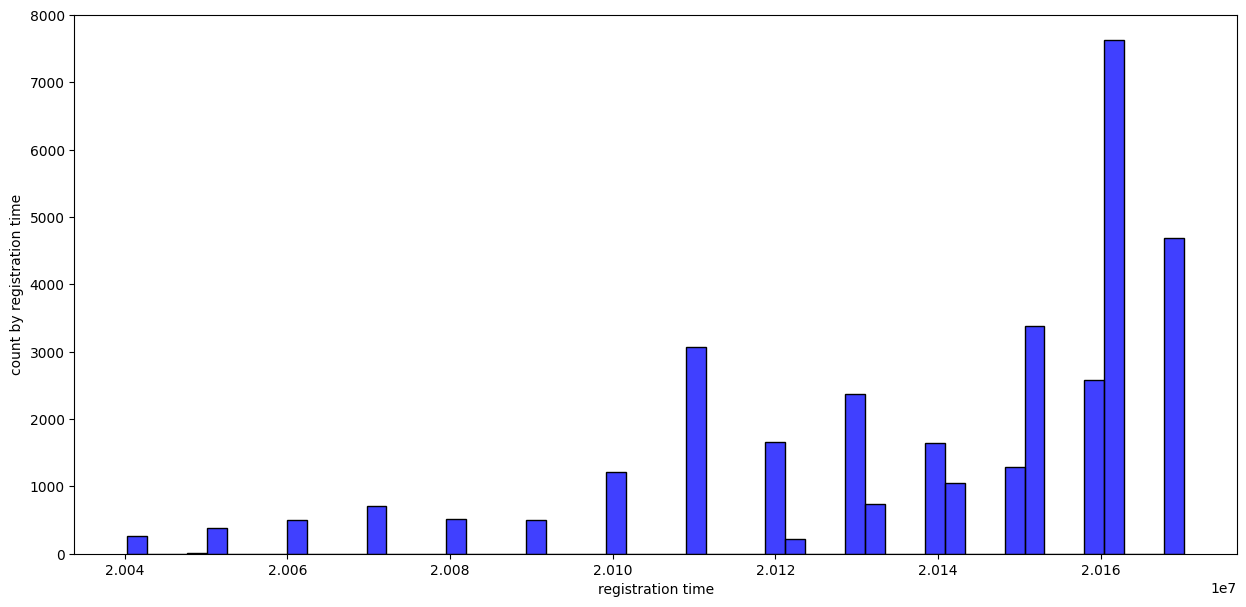

In [175]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=members_df, x='registration_init_time', color='blue')
ax.set_ylabel('count by registration time')
ax.set_xlabel('registration time')
plt.show()

# Анализ songs_df

In [176]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [177]:
songs_df.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


**Уникальные значения по признакам**

In [178]:
for col in songs_df.columns:
    num = songs_df[col].nunique()
    print(f'number of unique {col}: {num}')

number of unique song_id: 2296320
number of unique song_length: 146534
number of unique genre_ids: 1045
number of unique artist_name: 222363
number of unique composer: 329822
number of unique lyricist: 110924
number of unique language: 10


**genre_ids**

In [179]:
songs_df.genre_ids.value_counts()

genre_ids
465              567911
958              176349
2022             168870
1609             166457
2122             139938
                  ...  
388|1138              1
1152|139|94           1
388|2086              1
465|2130|2122         1
1152|2130             1
Name: count, Length: 1045, dtype: int64

In [180]:
# количество "множественных" жанров
(songs_df.genre_ids.value_counts().to_frame()['count'] == 1).sum()

197

**artist_name**

In [181]:
songs_df.artist_name.value_counts()

artist_name
Various Artists        145916
証聲音樂圖書館 ECHO MUSIC      11276
Billy Vaughn             4828
รวมศิลปิน                4432
Richard Clayderman       4180
                        ...  
Le Petit Prince             1
Stefanie                    1
Barenhvrd| Todiefor         1
Jamyang Sakya               1
Multy Tabs                  1
Name: count, Length: 222363, dtype: int64

In [182]:
# артисты встречающиеся по одному разу
(songs_df.artist_name.value_counts().to_frame()['count'] == 1).sum()

107835

**Сколько песен прослушал каждый пользователь**

In [183]:
user_song_cnt = train_df[['msno', 'song_id']].groupby('msno').count().reset_index()

In [184]:
user_song_cnt.sort_values('song_id', ascending=False).iloc[:20]

,msno,song_id
11658,MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=,5819
25014,o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=,5537
8158,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,5511
10550,KGXNZ/H3VxvET/+rGxlrAe7Gpz2eKMXyuSg3xh8Ij1M=,4217
19681,cqjRBV/jWN2ujhc+z/4tz+Mj6xEfflAAt6qBXCqxKvw=,4008
21924,hYJpPvGod6vy09TnlXdQe3Q0vlxju5u5Ruf8V2XkTio=,3926
14552,SZ5NNypqaTWljFO1HiVZwkw3713+rM9x/JNdJd8/fzc=,3733
19989,dU4RbzpIRRd/EkA9Xncpy9CglzDBZp7nKMfdnfr3Aj8=,3686
12590,OOUnJuX4SteRhUdJZ9B2DqtfiwsfcZVBefEhXLeBsFg=,3239
21126,frZtrrN1Y2ZqZX3VFiq7FpAvLth3kZJNovT9cmyn2O4=,3177


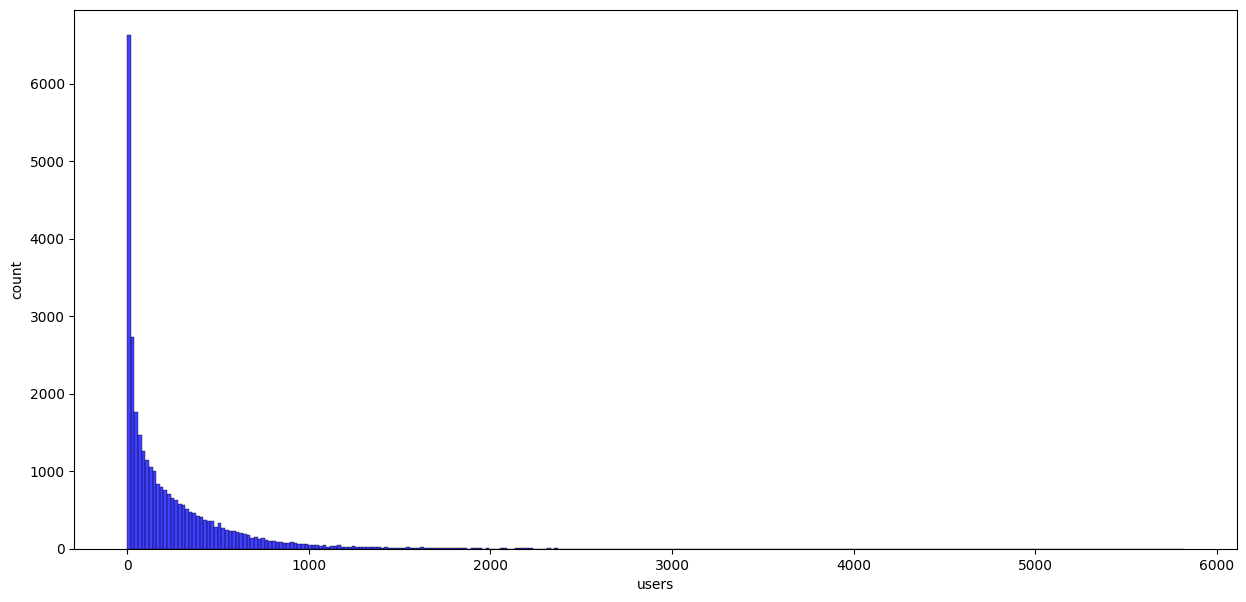

In [185]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=user_song_cnt, x='song_id', color='blue')
ax.set_ylabel('count')
ax.set_xlabel('users')
plt.show()

# Пропуски

Объединим таблицы, чтобы было удобнее смотреть

In [186]:
df_full = pd.merge(train_df, songs_df, on='song_id', how='left')
df_full = pd.merge(df_full, members_df, on='msno', how='left')

In [187]:
df_full.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,1,0,NaN,7,20120102,20171005


In [188]:
dtypes = pd.DataFrame(df_full.dtypes,columns=["Data Type"])
dtypes['Unique Values']=df_full.nunique().sort_values(ascending=True)
dtypes['Null Values']=df_full.isnull().sum()
dtypes['% null Values']=df_full.isnull().sum() / len(df_full)
dtypes.sort_values(by='Null Values' , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

,Data Type,Unique Values,Null Values,% null Values
lyricist,object,33887,3178812,0.430884
gender,object,2,2961479,0.401425
composer,object,76064,1675706,0.227140
source_screen_name,object,20,414804,0.056226
genre_ids,object,572,118455,0.016056
source_system_tab,object,8,24849,0.003368
source_type,object,12,21539,0.002920
language,float64,10,150,0.000020
song_length,float64,60266,114,0.000015
artist_name,object,40582,114,0.000015


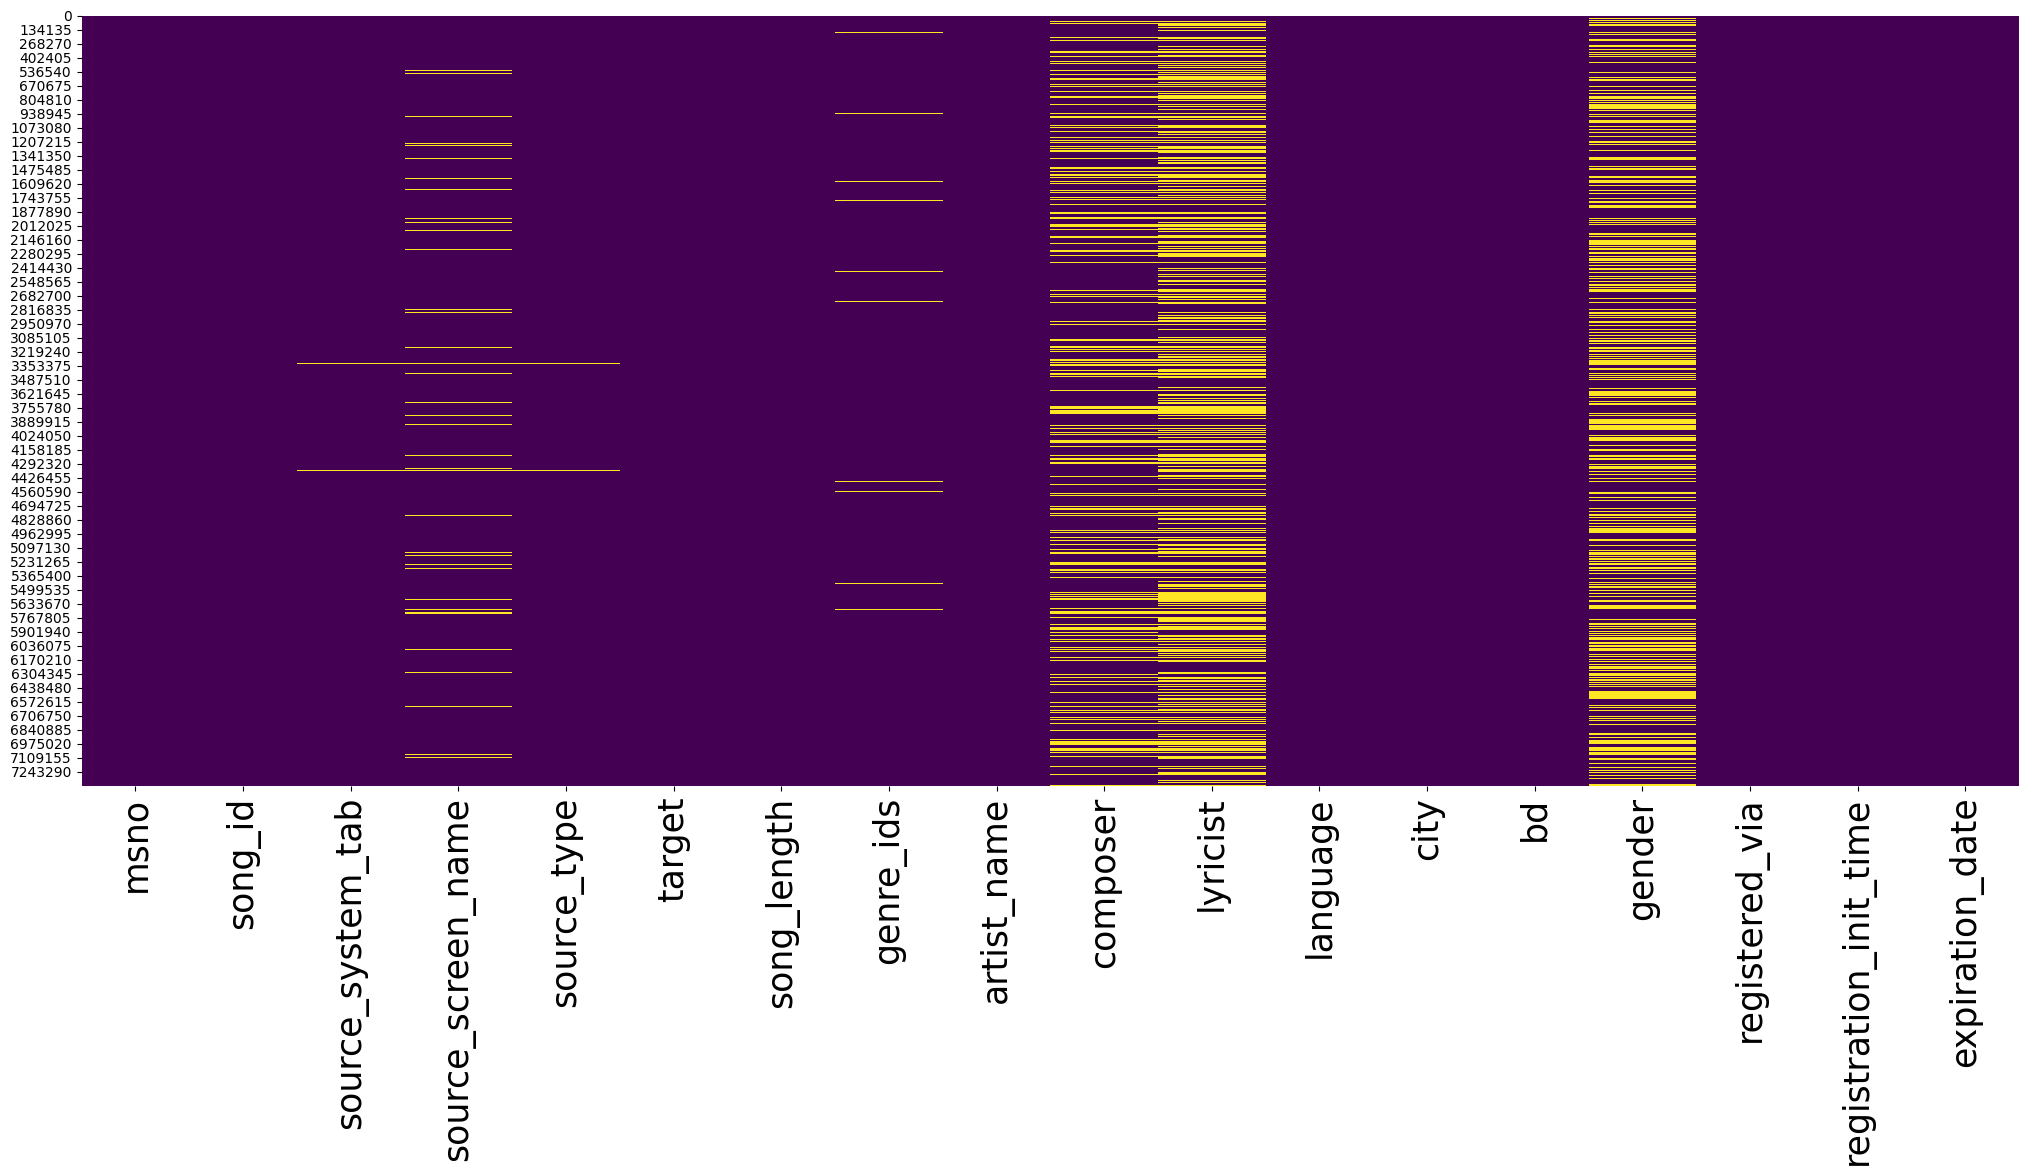

In [189]:
plt.figure(figsize=(25,10))
sns.heatmap(df_full.isnull(), cbar=False, cmap='viridis')
plt.tick_params(axis='x', labelsize=25)

**new_df для работы с выбранными признаками**

In [190]:
new_df = df_full[['msno', 'song_id', 'source_system_tab', 'source_type', 'song_length', 'genre_ids', 'artist_name', 'target']]
new_df

,msno,song_id,source_system_tab,source_type,song_length,genre_ids,artist_name,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,online-playlist,206471.0,359,Bastille,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,local-playlist,284584.0,1259,Various Artists,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,local-playlist,225396.0,1259,Nas,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,local-playlist,255512.0,1019,Soundway,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,online-playlist,187802.0,1011,Brett Young,1
...,...,...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,local-playlist,267958.0,1259,Dr. Dre,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,song,227404.0,465,R. City feat. Adam Levine,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,song,258298.0,465,兄弟本色G.U.T.S. (姚中仁、張震嶽、頑童MJ116),1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,online-playlist,524146.0,2122,Brad Mehldau Trio,1


In [191]:
# уменьшение размера исходного датасета
new_df = new_df.sample(frac=0.1)

In [192]:
del train_df
del songs_df
del members_df
del df_full

In [193]:
new_df.shape

(737742, 8)

In [194]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 737742 entries, 3017604 to 4372505
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   msno               737742 non-null  object 
 1   song_id            737742 non-null  object 
 2   source_system_tab  735259 non-null  object 
 3   source_type        735613 non-null  object 
 4   song_length        737731 non-null  float64
 5   genre_ids          725994 non-null  object 
 6   artist_name        737731 non-null  object 
 7   target             737742 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 50.7+ MB


In [195]:
new_df.isna().sum()

msno                     0
song_id                  0
source_system_tab     2483
source_type           2129
song_length             11
genre_ids            11748
artist_name             11
target                   0
dtype: int64

**Заполнение пропусков**

In [196]:
for col in new_df.select_dtypes(include=['object']).columns:
    new_df[col] = new_df[col].fillna(value = "unknown")
   
for col in new_df.select_dtypes(exclude=['object']).columns:
    new_df[col] = new_df[col].fillna(value = new_df[col].mean())

In [197]:
new_df.isna().sum()

msno                 0
song_id              0
source_system_tab    0
source_type          0
song_length          0
genre_ids            0
artist_name          0
target               0
dtype: int64

# Кодирование категориальных признаков

In [ ]:
cols = ['source_system_tab', 'source_type', 'genre_ids', 'artist_name']

In [ ]:
for col in df[cols]:
    df[col] = df[col].astype('category')
    
for col in df[cols]:
    df[col] = df[col].cat.codes

In [ ]:
df.info()

# Нормирование с помощью MinMaxScaler

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

In [ ]:
# norm_cols = cols + ['song_length'] 

In [ ]:
# scaler = MinMaxScaler()
# normalized_df = scaler.fit_transform(df[norm_cols])

# print(normalized_df[:2])

# Создание модели

# Вариант 1
# Collaborative Filtering

In [198]:
# копия чтобы сохранить new_df
df = new_df[['msno', 'song_id', 'target']]

In [199]:
df = df.sample(frac=0.1)
df.shape

(73774, 3)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73774 entries, 6170479 to 4488952
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   msno     73774 non-null  object
 1   song_id  73774 non-null  object
 2   target   73774 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [201]:
df.nunique()

msno       18758
song_id    27416
target         2
dtype: int64

In [202]:
df['msno_cat'] = df.msno.astype('category')

In [203]:
# замена кода пользователя на индекс + уменьшение размерности до 1000 уникальных пользователей
users_id_1k = df['msno_cat'].unique()[:1000]
users_dict = {id: i for i, id in enumerate(users_id_1k)}

In [204]:
small_df = df[df['msno_cat'].isin(users_id_1k).copy()]
small_df.head()

,msno,song_id,target,msno_cat
6170479,9ZDhvmeOA7Qbyf53oUzZvnVwo0419w9Ydf+WI9++HAQ=,CfOyUSvBAIGhsUEcZ6hTnWLLaQrDtzVmoIdmIMXBOTA=,1,9ZDhvmeOA7Qbyf53oUzZvnVwo0419w9Ydf+WI9++HAQ=
732704,lcos4qYchFaYNFsQKZ2nehB50lKZuhYT61fwrgGUWwE=,3fHyTTj/D/eNujsqhCUQRyFLiiOL/btvxpcUwia6d8Y=,0,lcos4qYchFaYNFsQKZ2nehB50lKZuhYT61fwrgGUWwE=
4095878,0fce+q/77QsoHU7RbKVPvxYNu+4otDwIixumQ7UOcsc=,vK4ff84EPS0Fcb6T9h240uEQDAKZEVybuF0lHQYZ+V8=,0,0fce+q/77QsoHU7RbKVPvxYNu+4otDwIixumQ7UOcsc=
524449,cBT0mFe4knne5VgcBBUXMWU07N6W+XgtKEmvxFrTHYg=,kVtk5At17zUXW2nlGMaiV1zqNH1eUhbft0/nM0iXNwI=,1,cBT0mFe4knne5VgcBBUXMWU07N6W+XgtKEmvxFrTHYg=
4416085,tlFGRF/TtrSwJA9XPHL4cajWghZCbAbhzif/6wJiN6Q=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,tlFGRF/TtrSwJA9XPHL4cajWghZCbAbhzif/6wJiN6Q=


In [205]:
tqdm.pandas()

def replace(x):
    try:
        res = users_dict[x.msno_cat]
    except Exeption as e:
        print(e)
        es = -1
    return res

In [206]:
small_df['msno'] = small_df.progress_apply(replace, axis=1)
small_df.head()

100%|██████████| 7194/7194 [00:00<00:00, 47846.12it/s]


,msno,song_id,target,msno_cat
6170479,0,CfOyUSvBAIGhsUEcZ6hTnWLLaQrDtzVmoIdmIMXBOTA=,1,9ZDhvmeOA7Qbyf53oUzZvnVwo0419w9Ydf+WI9++HAQ=
732704,1,3fHyTTj/D/eNujsqhCUQRyFLiiOL/btvxpcUwia6d8Y=,0,lcos4qYchFaYNFsQKZ2nehB50lKZuhYT61fwrgGUWwE=
4095878,2,vK4ff84EPS0Fcb6T9h240uEQDAKZEVybuF0lHQYZ+V8=,0,0fce+q/77QsoHU7RbKVPvxYNu+4otDwIixumQ7UOcsc=
524449,3,kVtk5At17zUXW2nlGMaiV1zqNH1eUhbft0/nM0iXNwI=,1,cBT0mFe4knne5VgcBBUXMWU07N6W+XgtKEmvxFrTHYg=
4416085,4,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,tlFGRF/TtrSwJA9XPHL4cajWghZCbAbhzif/6wJiN6Q=


In [207]:
small_df.msno.value_counts()

msno
834    54
240    53
238    44
347    39
380    37
       ..
438     1
439     1
813     1
67      1
81      1
Name: count, Length: 1000, dtype: int64

In [208]:
grouped_df = small_df.groupby(['msno', 'song_id'])['song_id'].count()
grouped_df

msno  song_id                                     
0     2N+immR0KNVWHrywXoN/yZetO0OkZWNmRT+Qu8THtjs=    1
      BwDDym6Tp7EnGudWBGJyjONZeX0/4ndu5PETiPWzav8=    1
      CfOyUSvBAIGhsUEcZ6hTnWLLaQrDtzVmoIdmIMXBOTA=    1
      JuOOeJJjt5Dgbug0czZ6Mv25AJMtVAukaoxz8T/JX7c=    1
      U8VgelI8G461f4FVJHnavdn4zx7XjmSFcNHZ3Hru3TU=    1
                                                     ..
999   6uCt0I6XmmXX7fta96XlZyxtSWXlTa2ZviRbxnDUa/w=    1
      95c7DAPEYsXPp72TZ4teA4ErdV1TNjajZcdk/if6AVM=    1
      ImP/1Ep+G60Cf7kqPys6I11Ub1Zxo6WNnuKq5WjVvhg=    1
      eBme/h4Z4eP7BZY3tifu5Lr/dRB9NQJVIl36jZ5DZGQ=    1
      y2lvi3pdAy8K+Mezrq5xgdvgktxLt3l1OBPAkgTGh3E=    1
Name: song_id, Length: 7194, dtype: int64

In [209]:
# создание матрицы пользователь-песня
user_song_matrix = grouped_df.unstack('song_id')
user_song_matrix

song_id,++QfzyM/LiFaCuvkDFK/wJe13ZEMgTgAaVCcolo7nnY=,++ezxSWRgPo7VimLbuChif2kuAZI5G6bmKuDdautYtw=,+0ChkdWfAEY1dEW76JzobUaYwU00k8KGFbvMN6UnBi8=,+0e3zx++peOiNYT9o/brNArf3uY6bXNYC2O5sw8aBdg=,+0sWOem3wuNXcTMFQWfHghLXLN8PQRL9xqqonvgJPrE=,+11cGGhMIN0QqBhZoO3ijrUr/pMXwM1zEQzYWWE00OA=,+3fcBEye55N0mFZZKEhjIBxHyR7UWiaFMlNNEodh4ds=,+5ZCOEXhlsvSoRGDSda+wMxxHQOceg+Tzxw6a4Wyxso=,+69V2d0gNPN2ncI+hOVGQMYGCjeQnJyXIJTs/tRew8A=,+6Brw+Pg/N3xLQHsLu9EecK0o27VNh5LMwB0QTH8UhU=,...,zqz14csnLSOf67B2BvzD/tcTZC5su6zJIBpxH8p/RkQ=,zra4AicYlB41F6XQyI5gbSYLddDXO+4RL5BFfL6wSyM=,zrpibgya17Ts+MHFuwUDP7Kw3UvAWmT/XGBGTelfCYM=,ztGhp1RrSLLyzEqNjFQ+Z690YbYxWlZ9OiNWRm/o4wg=,zvZrBE1h85EUOTllHRHvl3IefY2Pj79jyYqQ0B3JLb8=,zvjlLoB+A+0WiqVyk+My4kEpKyV5d76Dl1GBXtL05IM=,zx4aCmk+b/uPmvESsG8ekvi7qWmifSPNMXg1i8wyG8Q=,zxaeTZGq1PE4G+C+CU/LMimJuOx2pOd8fiTh2Z1CIIs=,zyO10vXfMjUGAE7XqKbK2pS8VGN8dWZ6s2PsD8gbKJk=,zzEidlJMTSSbJcfTFHb0u9mv6oSogCWU6DAIuhqFEuQ=
msno,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
user_song_matrix = user_song_matrix.applymap(lambda x: 1 if x > 0 else 0)
user_song_matrix.head()

song_id,++QfzyM/LiFaCuvkDFK/wJe13ZEMgTgAaVCcolo7nnY=,++ezxSWRgPo7VimLbuChif2kuAZI5G6bmKuDdautYtw=,+0ChkdWfAEY1dEW76JzobUaYwU00k8KGFbvMN6UnBi8=,+0e3zx++peOiNYT9o/brNArf3uY6bXNYC2O5sw8aBdg=,+0sWOem3wuNXcTMFQWfHghLXLN8PQRL9xqqonvgJPrE=,+11cGGhMIN0QqBhZoO3ijrUr/pMXwM1zEQzYWWE00OA=,+3fcBEye55N0mFZZKEhjIBxHyR7UWiaFMlNNEodh4ds=,+5ZCOEXhlsvSoRGDSda+wMxxHQOceg+Tzxw6a4Wyxso=,+69V2d0gNPN2ncI+hOVGQMYGCjeQnJyXIJTs/tRew8A=,+6Brw+Pg/N3xLQHsLu9EecK0o27VNh5LMwB0QTH8UhU=,...,zqz14csnLSOf67B2BvzD/tcTZC5su6zJIBpxH8p/RkQ=,zra4AicYlB41F6XQyI5gbSYLddDXO+4RL5BFfL6wSyM=,zrpibgya17Ts+MHFuwUDP7Kw3UvAWmT/XGBGTelfCYM=,ztGhp1RrSLLyzEqNjFQ+Z690YbYxWlZ9OiNWRm/o4wg=,zvZrBE1h85EUOTllHRHvl3IefY2Pj79jyYqQ0B3JLb8=,zvjlLoB+A+0WiqVyk+My4kEpKyV5d76Dl1GBXtL05IM=,zx4aCmk+b/uPmvESsG8ekvi7qWmifSPNMXg1i8wyG8Q=,zxaeTZGq1PE4G+C+CU/LMimJuOx2pOd8fiTh2Z1CIIs=,zyO10vXfMjUGAE7XqKbK2pS8VGN8dWZ6s2PsD8gbKJk=,zzEidlJMTSSbJcfTFHb0u9mv6oSogCWU6DAIuhqFEuQ=
msno,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
# матрица косинусного расстояния между пользователями
cosin_sim = cosine_similarity(user_song_matrix, user_song_matrix)
cosin_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [212]:
cosin_sim.shape

(1000, 1000)

In [213]:
cosin_sim_df = pd.DataFrame(cosin_sim)
cosin_sim_df.columns = user_song_matrix.index
cosin_sim_df['msno'] = user_song_matrix.index
cosin_sim_df = cosin_sim_df.set_index('msno')
cosin_sim_df.head()

msno,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
msno,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.158114,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.094491,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.000000,0.048113,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.048113,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


**тест на одном пользователе**

In [214]:
lst = cosin_sim_df.loc[4].sort_values(ascending=False)[1:]
lst

msno
687    0.192450
144    0.136083
147    0.136083
857    0.096225
482    0.086066
         ...   
345    0.000000
346    0.000000
347    0.000000
348    0.000000
333    0.000000
Name: 4, Length: 999, dtype: float64

In [215]:
# песни 4 пользователя
user_test = user_song_matrix.loc[4]
songs_user_test = user_test[user_test > 0].index.to_list()
songs_user_test

['+8UfgJErHTewYxbZIfMpSFJQuCYTHRtUkjn9Tuksj7o=',
 '+r9stcfohC0zfYQlZSOO0pL3z1qH4LeF8jr2/7Lcq1c=',
 '69RnNkpZ52AJijzR8z2eVM7u9ojf0cQKEvNnrRetOvQ=',
 '6BiJwZfGzdhuF7aq5MqoDqS5DZTIjyTYQowCoMROhkY=',
 '7EnDBkQYJpipCyRd9JBsug4iKnfAunUXc14/96cNotg=',
 '7tu5ogbBPCBw1o2fRx1ETg7d/BxEt2UgNNN9GuxW6EU=',
 '9PqoEyiHgHrlbrpEJ9Pxoz/cqyLPQJR78zbqvmjCds0=',
 'C9wSqzSJjlYDAwWNvIj0wtlCH0vShoex/xc3gmowmQg=',
 'CYQ38DzaKqRnuEfAB5kuQmFborYHWzbqO/7Bvny/2Mg=',
 'FJuS4Y4HbdZYGKSdQ3Z6Sal9WPQ/32sP/hB8BMJWPD8=',
 'JgOfPnluwAsKhpdLQgbfoSHpaZ74zcWYPqhhvhmFAtY=',
 'P7/61WPWYRvIXYhL82OvWR+42EysicDX3qUhSdVwQIw=',
 'RpSRb8AQXV+OHjx0dplANJZKEB23G9pheyTmhPNd2QA=',
 'Ru7n8Xw2s8LGDsgDhyzWqCWQRWQW9KNPY9qMOFAf5x0=',
 'SKsxf0Q1t6zHtjwDuAE+RSzvzwpiYN/pzBirLZGy/Rs=',
 'Sk9ydQ85xpTXVtTfOuTWToGcAyV9BA1vSV3WzwRQMdI=',
 'Ux2OU4gkQYOtBvqocEkIFz3QWCBo/aLpx198pU3bFQs=',
 'XUz4Z4wPPChz+OIwkwj7HJ8teIjW3rEMdEATM80rDxM=',
 'abk4tf/dNVAxTxSCSu1DCKewmzDt2/qwF0oCB/hEPgQ=',
 'akxzwgFS7jaWROaEoq2krR81Ia6N377uswYOi3Vdxmk=',
 'c2bp6xlq7o3Pj6x95d

In [216]:
# песни пользователя максимально похожего на 4
sim_user = user_song_matrix.loc[687]
songs_sim_user_test = sim_user[sim_user > 0].index.to_list()
songs_sim_user_test

['7EnDBkQYJpipCyRd9JBsug4iKnfAunUXc14/96cNotg=']

In [217]:
# их разница - рекоммендация для пользователя 5
# set(songs_sim_user_test) - (songs_user_test)
# В данном случае рекомендуем не только новые, но и уже прослушанные песни
rec_songs = set(songs_sim_user_test + songs_user_test)
rec_songs

{'+8UfgJErHTewYxbZIfMpSFJQuCYTHRtUkjn9Tuksj7o=',
 '+r9stcfohC0zfYQlZSOO0pL3z1qH4LeF8jr2/7Lcq1c=',
 '69RnNkpZ52AJijzR8z2eVM7u9ojf0cQKEvNnrRetOvQ=',
 '6BiJwZfGzdhuF7aq5MqoDqS5DZTIjyTYQowCoMROhkY=',
 '7EnDBkQYJpipCyRd9JBsug4iKnfAunUXc14/96cNotg=',
 '7tu5ogbBPCBw1o2fRx1ETg7d/BxEt2UgNNN9GuxW6EU=',
 '9PqoEyiHgHrlbrpEJ9Pxoz/cqyLPQJR78zbqvmjCds0=',
 'C9wSqzSJjlYDAwWNvIj0wtlCH0vShoex/xc3gmowmQg=',
 'CYQ38DzaKqRnuEfAB5kuQmFborYHWzbqO/7Bvny/2Mg=',
 'FJuS4Y4HbdZYGKSdQ3Z6Sal9WPQ/32sP/hB8BMJWPD8=',
 'JgOfPnluwAsKhpdLQgbfoSHpaZ74zcWYPqhhvhmFAtY=',
 'P7/61WPWYRvIXYhL82OvWR+42EysicDX3qUhSdVwQIw=',
 'RpSRb8AQXV+OHjx0dplANJZKEB23G9pheyTmhPNd2QA=',
 'Ru7n8Xw2s8LGDsgDhyzWqCWQRWQW9KNPY9qMOFAf5x0=',
 'SKsxf0Q1t6zHtjwDuAE+RSzvzwpiYN/pzBirLZGy/Rs=',
 'Sk9ydQ85xpTXVtTfOuTWToGcAyV9BA1vSV3WzwRQMdI=',
 'Ux2OU4gkQYOtBvqocEkIFz3QWCBo/aLpx198pU3bFQs=',
 'XUz4Z4wPPChz+OIwkwj7HJ8teIjW3rEMdEATM80rDxM=',
 'abk4tf/dNVAxTxSCSu1DCKewmzDt2/qwF0oCB/hEPgQ=',
 'akxzwgFS7jaWROaEoq2krR81Ia6N377uswYOi3Vdxmk=',
 'c2bp6xlq7o3Pj6x95d

In [218]:
def recommend_song(user_id, cosin_sim, user_song_matrix):
    """
    Функция для определения похожих песен
    song_id: песня для которой нужна рекомендация
    cosin_sim: матрица похожести
    user_song_matrix: матрица пользователь-песня
    output: похожие песни
    """
    list_sim_users = cosin_sim.loc[user_id].sort_values(ascending=False)[1:]
    user = user_song_matrix.loc[user_id]
    songs_user = user[user > 0].index.to_list()
    rec_songs = set(songs_user)
    for sim_id in list_sim_users.index:
        sim_user = user_song_matrix.loc[sim_id]
        songs_sim_user = sim_user[sim_user > 0].index.to_list()
        rec_songs.union(set(songs_sim_user))
    return list(rec_songs)

In [219]:
lst_rec = recommend_song(4, cosin_sim_df, user_song_matrix)
lst_rec

['abk4tf/dNVAxTxSCSu1DCKewmzDt2/qwF0oCB/hEPgQ=',
 'FJuS4Y4HbdZYGKSdQ3Z6Sal9WPQ/32sP/hB8BMJWPD8=',
 'akxzwgFS7jaWROaEoq2krR81Ia6N377uswYOi3Vdxmk=',
 'jWbDRDqYkst9SRNSUlnKQDfRTAEea6eeYxl7GEG1EeM=',
 'JgOfPnluwAsKhpdLQgbfoSHpaZ74zcWYPqhhvhmFAtY=',
 '9PqoEyiHgHrlbrpEJ9Pxoz/cqyLPQJR78zbqvmjCds0=',
 'yvFOOFBnTqr/5J0OY53/iuueCDXbCmTHjtfN401ehns=',
 'C9wSqzSJjlYDAwWNvIj0wtlCH0vShoex/xc3gmowmQg=',
 'Ru7n8Xw2s8LGDsgDhyzWqCWQRWQW9KNPY9qMOFAf5x0=',
 'P7/61WPWYRvIXYhL82OvWR+42EysicDX3qUhSdVwQIw=',
 'Ux2OU4gkQYOtBvqocEkIFz3QWCBo/aLpx198pU3bFQs=',
 '+8UfgJErHTewYxbZIfMpSFJQuCYTHRtUkjn9Tuksj7o=',
 'SKsxf0Q1t6zHtjwDuAE+RSzvzwpiYN/pzBirLZGy/Rs=',
 'XUz4Z4wPPChz+OIwkwj7HJ8teIjW3rEMdEATM80rDxM=',
 'CYQ38DzaKqRnuEfAB5kuQmFborYHWzbqO/7Bvny/2Mg=',
 '+r9stcfohC0zfYQlZSOO0pL3z1qH4LeF8jr2/7Lcq1c=',
 'c2bp6xlq7o3Pj6x95ddX67S/wGsP6qPN/8PqM1DL0a8=',
 '6BiJwZfGzdhuF7aq5MqoDqS5DZTIjyTYQowCoMROhkY=',
 'dKfxhaRKwvhiYOUQ5JlkxQrJ/dDksdFueybCIdG5dXI=',
 '7EnDBkQYJpipCyRd9JBsug4iKnfAunUXc14/96cNotg=',
 '7tu5ogbBPCBw1o2fRx

**рекомендация для всех пользователей**

In [220]:
rec_songs_lst = []
for i in tqdm(range(1000)):
    rec_songs_lst.append(recommend_song(i, cosin_sim_df, user_song_matrix)[:21])

100%|██████████| 1000/1000 [04:27<00:00,  3.74it/s]


In [221]:
rec_songs_lst[:2]

[['2N+immR0KNVWHrywXoN/yZetO0OkZWNmRT+Qu8THtjs=',
  'CfOyUSvBAIGhsUEcZ6hTnWLLaQrDtzVmoIdmIMXBOTA=',
  'WeJhpoH5YVOanANcrswwdfyGh3BOai63RQNrAWeQzLY=',
  'cQI8Uzy06tt/XJ59vDlifTQTl2qOiTFBkf5yVCUNoyg=',
  'JuOOeJJjt5Dgbug0czZ6Mv25AJMtVAukaoxz8T/JX7c=',
  'Y2CFnBr/mdTuaxOu3vKcbuUBE0UmhAIx+Pkgazp+j4c=',
  'U8VgelI8G461f4FVJHnavdn4zx7XjmSFcNHZ3Hru3TU=',
  'BwDDym6Tp7EnGudWBGJyjONZeX0/4ndu5PETiPWzav8='],
 ['6tIeOQjCKyd4amJOHSf1PckW6D9RC3ZKgw/ihage2m4=',
  'RfC/qUw0sMMB6XLwgVM4G2/L4e8W7CnixpbpDXS8wqg=',
  'EopfCJeg62viBKM/CebBk5xZAK8K+iRciUN0AcuoRBA=',
  'IIPVkO6EB8ymcuxkuxkum1N5gowLdTzy9sYF9luyhVk=',
  'LwtRYA8Uy9U3/D6tmhmj/2duMO0CVrUO5mgqUep7lko=',
  'HzCFc9gU/AuYNF1ld1ZlyeCpQvVLTonc8+ZrUAidmmY=',
  'fTgG66+V6y7Am5SFdjzdr3v3m7El4go59ALIy4DDAvI=',
  'm7waGx9Vkj4ylVVuX5l1Hr9ZlS5uGikk7O61iJtWgBE=',
  '3fHyTTj/D/eNujsqhCUQRyFLiiOL/btvxpcUwia6d8Y=',
  'rq5MY1RNNpUT828woEEdLCkhVKaz93SKmysrLhspgT8=',
  'c1hEndX7iONHj07EPRGDz+xfztsqQNVAgtuo801tRHs=',
  'jZVQRajq2WbbIoSiF5MSCyJKgTt7tpITHayD3PYKg88=',

In [222]:
recs = pd.DataFrame()
recs['msno'] = [i for i in range(1000)]
recs['song_id'] = rec_songs_lst

In [223]:
recs.head()

,msno,song_id
0,0,"[2N+immR0KNVWHrywXoN/yZetO0OkZWNmRT+Qu8THtjs=,..."
1,1,"[6tIeOQjCKyd4amJOHSf1PckW6D9RC3ZKgw/ihage2m4=,..."
2,2,"[bs0hF+2uQhJdcMXZ/ThYoiIaDgeGqw/Cr7fVU5kMgyI=,..."
3,3,"[BgqjNqzsyCpEGvxyUmktvHC8WO5+FQO/pQTaZ4broMU=,..."
4,4,"[abk4tf/dNVAxTxSCSu1DCKewmzDt2/qwF0oCB/hEPgQ=,..."


In [224]:
recs = recs.explode('song_id')
recs['predict'] = 1
recs.head()

,msno,song_id,predict
0,0,2N+immR0KNVWHrywXoN/yZetO0OkZWNmRT+Qu8THtjs=,1
0,0,CfOyUSvBAIGhsUEcZ6hTnWLLaQrDtzVmoIdmIMXBOTA=,1
0,0,WeJhpoH5YVOanANcrswwdfyGh3BOai63RQNrAWeQzLY=,1
0,0,cQI8Uzy06tt/XJ59vDlifTQTl2qOiTFBkf5yVCUNoyg=,1
0,0,JuOOeJJjt5Dgbug0czZ6Mv25AJMtVAukaoxz8T/JX7c=,1


In [225]:
# объединение таблиц с предсказанием и таргетом
res = pd.merge(small_df, recs, on=['msno', 'song_id'], how="left")
res['predict'] = res['predict'].fillna(0).astype(int)
res['target'] = res['target'].astype(int)
res.head()

,msno,song_id,target,msno_cat,predict
0,0,CfOyUSvBAIGhsUEcZ6hTnWLLaQrDtzVmoIdmIMXBOTA=,1,9ZDhvmeOA7Qbyf53oUzZvnVwo0419w9Ydf+WI9++HAQ=,1
1,1,3fHyTTj/D/eNujsqhCUQRyFLiiOL/btvxpcUwia6d8Y=,0,lcos4qYchFaYNFsQKZ2nehB50lKZuhYT61fwrgGUWwE=,1
2,2,vK4ff84EPS0Fcb6T9h240uEQDAKZEVybuF0lHQYZ+V8=,0,0fce+q/77QsoHU7RbKVPvxYNu+4otDwIixumQ7UOcsc=,1
3,3,kVtk5At17zUXW2nlGMaiV1zqNH1eUhbft0/nM0iXNwI=,1,cBT0mFe4knne5VgcBBUXMWU07N6W+XgtKEmvxFrTHYg=,1
4,4,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,tlFGRF/TtrSwJA9XPHL4cajWghZCbAbhzif/6wJiN6Q=,0


# Тестирование

In [226]:
from sklearn.metrics import f1_score

In [227]:
res['predict'].value_counts()

predict
1    6930
0     264
Name: count, dtype: int64

In [228]:
f1_score(res['target'], res['predict'])

0.6715589425157588

In [229]:
from sklearn.metrics import ndcg_score

In [230]:
true = res['target'].to_list()
pred = res['predict'].to_list()

In [231]:
ndcg_score([true], [pred], k=20)

0.515007215007215

# Вариант 2
# Content-based

In [256]:
df = new_df.copy()

In [257]:
df = df.sample(frac=0.1)
df.shape

(73774, 8)

In [234]:
df.nunique()

msno                 18802
song_id              27331
source_system_tab        9
source_type             13
song_length          11569
genre_ids              251
artist_name           6664
target                   2
dtype: int64

In [258]:
df['msno_cat'] = df.msno.astype('category')

In [259]:
# замена кода пользователя на индекс + уменьшение размерности до 1000 уникальных пользователей
users_id_1k = df['msno_cat'].unique()[:1000]
users_dict = {id: i for i, id in enumerate(users_id_1k)}

In [289]:
small_df = df[df['msno_cat'].isin(users_id_1k).copy()]
small_df.head()

,msno,song_id,source_system_tab,source_type,song_length,genre_ids,artist_name,target,msno_cat
2513120,Zbs04DzuqbX03PrlDCAOCW1NFh6yNk3ughZKUTyJw0o=,llEGry04WR6RR6olBlPzOKO2lx3gxabQl9pU/MAjqqo=,explore,local-library,239020.0,465,spexial,1,Zbs04DzuqbX03PrlDCAOCW1NFh6yNk3ughZKUTyJw0o=
906709,PwnWgkloewAh6nr1MpRnSm6jbrltEb328ifDj7ccDZc=,wcw0/6Vl8mOPpS0WUysfaKaOv8eAXim4/LAQfyFhgZU=,discover,song-based-playlist,253074.0,465,南拳媽媽,1,PwnWgkloewAh6nr1MpRnSm6jbrltEb328ifDj7ccDZc=
687791,F+FIafu5lpFl/G8c4pzpeIHa/w1ZQWep6gIJ/rLhnUQ=,CXdtx7/QxePhjYwYFcXVv+lXjCDEGRJ9r/OC7IQXthw=,discover,online-playlist,307200.0,465,林宥嘉(yogalin),0,F+FIafu5lpFl/G8c4pzpeIHa/w1ZQWep6gIJ/rLhnUQ=
6117693,S7FV7CKTmx2ymejZJ54ehWdx322YN3Yrhr9LjIFfGd0=,YbHFVNzzIZRyDtxbsekDzLYG0QdGYsP2pN4BNT2KvPA=,discover,song-based-playlist,209211.0,465,fiveforfighting,1,S7FV7CKTmx2ymejZJ54ehWdx322YN3Yrhr9LjIFfGd0=
109210,PkekE9vAt2a2bSgh/11/hUskUFeSbAU9QSBtldfP2mY=,kE+FVLsG03zTzYoGVDqTmVkoSKC9DjJwQr2puF6MkOI=,search,top-hits-for-artist,211670.0,444,blackpink,0,PkekE9vAt2a2bSgh/11/hUskUFeSbAU9QSBtldfP2mY=


In [238]:
tqdm.pandas()

def replace(x):
    try:
        res = users_dict[x.msno_cat]
    except Exeption as e:
        print(e)
        es = -1
    return res

In [290]:
small_df['msno'] = small_df.progress_apply(replace, axis=1)
small_df.head()

100%|██████████| 7020/7020 [00:00<00:00, 50992.72it/s]


,msno,song_id,source_system_tab,source_type,song_length,genre_ids,artist_name,target,msno_cat
2513120,0,llEGry04WR6RR6olBlPzOKO2lx3gxabQl9pU/MAjqqo=,explore,local-library,239020.0,465,spexial,1,Zbs04DzuqbX03PrlDCAOCW1NFh6yNk3ughZKUTyJw0o=
906709,1,wcw0/6Vl8mOPpS0WUysfaKaOv8eAXim4/LAQfyFhgZU=,discover,song-based-playlist,253074.0,465,南拳媽媽,1,PwnWgkloewAh6nr1MpRnSm6jbrltEb328ifDj7ccDZc=
687791,2,CXdtx7/QxePhjYwYFcXVv+lXjCDEGRJ9r/OC7IQXthw=,discover,online-playlist,307200.0,465,林宥嘉(yogalin),0,F+FIafu5lpFl/G8c4pzpeIHa/w1ZQWep6gIJ/rLhnUQ=
6117693,3,YbHFVNzzIZRyDtxbsekDzLYG0QdGYsP2pN4BNT2KvPA=,discover,song-based-playlist,209211.0,465,fiveforfighting,1,S7FV7CKTmx2ymejZJ54ehWdx322YN3Yrhr9LjIFfGd0=
109210,4,kE+FVLsG03zTzYoGVDqTmVkoSKC9DjJwQr2puF6MkOI=,search,top-hits-for-artist,211670.0,444,blackpink,0,PkekE9vAt2a2bSgh/11/hUskUFeSbAU9QSBtldfP2mY=


In [240]:
def clean_data(x):
    return str.lower(x.replace(' ', ''))

In [291]:
features = ['source_system_tab', 'source_type', 'artist_name']
for f in features:
    df[f] = df[f].apply(clean_data)

In [242]:
def create_soup(x):
    return x['source_system_tab'] +' '+ x['source_type'] +' '+ x['genre_ids'] +' '+ x['artist_name'] 


In [292]:
small_df['soup'] = small_df.apply(create_soup, axis=1)

In [293]:
small_df[['soup']]

,soup
2513120,explore local-library 465 spexial
906709,discover song-based-playlist 465 南拳媽媽
687791,discover online-playlist 465 林宥嘉(yogalin)
6117693,discover song-based-playlist 465 fiveforfighting
109210,search top-hits-for-artist 444 blackpink
...,...
1760444,mylibrary local-library 458 五月天(mayday)
7105873,search song 94 dazzband
2906265,mylibrary online-playlist 465 品冠(victorwong)
461461,mylibrary local-library 2022 evanescence


In [245]:
from sklearn.feature_extraction.text import CountVectorizer

In [294]:
# матрица векторов
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(small_df['soup'])

In [283]:
count_matrix.shape

(7020, 2741)

In [295]:
# косинусная похожесть
cosin_sim = cosine_similarity(count_matrix, count_matrix)

In [296]:
small_df = small_df.reset_index()

In [324]:
indices = pd.Series(small_df.index, index=small_df['song_id']).drop_duplicates()

In [325]:
# ! повторяются песни !
indices = indices.drop_duplicates(subset='index', keep='first')

TypeError: Series.drop_duplicates() got an unexpected keyword argument 'subset'

In [322]:
indices

In [304]:
def generate_recommendation(song_id, model_type=cosin_sim):
    """
    Функция для определения похожих песен
    song_id: песня для которой нужна рекомендация
    output: 20 похожих песен
    """
    # индекс песни
    index = indices[song_id]
    # список песни для выбранной
    score = list(enumerate(model_type[index]))
    print(score)
    # отсортированные похожие песни
    similarity_score = sorted(score, key = lambda n: n[1], reverse=True)
    # 20 самых похожих
    similarity_score = similarity_score[1:21]
    top_songs_index = [i[0] for i in similarity_score]
    top_songs = df['song_id'].iloc[top_songs_index]
    return list(top_songs)

**рекомендация для одноной песни**

In [ ]:
generate_recommendation('YbHFVNzzIZRyDtxbsekDzLYG0QdGYsP2pN4BNT2KvPA=') 

In [318]:
indices['wcw0/6Vl8mOPpS0WUysfaKaOv8eAXim4/LAQfyFhgZU=']

song_id
wcw0/6Vl8mOPpS0WUysfaKaOv8eAXim4/LAQfyFhgZU=       1
wcw0/6Vl8mOPpS0WUysfaKaOv8eAXim4/LAQfyFhgZU=    2088
wcw0/6Vl8mOPpS0WUysfaKaOv8eAXim4/LAQfyFhgZU=    2379
wcw0/6Vl8mOPpS0WUysfaKaOv8eAXim4/LAQfyFhgZU=    2518
wcw0/6Vl8mOPpS0WUysfaKaOv8eAXim4/LAQfyFhgZU=    5066
dtype: int64

In [315]:
small_df.iloc[1]['song_id']

'wcw0/6Vl8mOPpS0WUysfaKaOv8eAXim4/LAQfyFhgZU='

In [299]:
rec_songs_lst = []
for i in tqdm(range(1000)):
    s_i = small_df.iloc[i]['song_id']
    rec_songs_lst.append(generate_recommendation(s_i))

  0%|          | 1/1000 [00:00<00:12, 78.62it/s]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
rec_songs_lst[:2]

In [ ]:
recs2 = pd.DataFrame()
recs2['msno'] = [i for i in range(1000)]
recs2['song_id'] = rec_songs_lst

In [ ]:
recs2.head()

In [ ]:
recs2 = recs2.explode('song_id')
recs2['predict'] = 1
recs2.head()

In [ ]:
# объединение таблиц с предсказанием и таргетом
res2 = pd.merge(small_df, recs2, on=['msno', 'song_id'], how="left")
res2['predict'] = res2['predict'].fillna(0).astype(int)
res2['target'] = res2['target'].astype(int)
res2.head()

# to be continued...